#Predicting Used Car Prices



In [ ]:
#Import libraries and dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.preprocessing import PolynomialFeatures  


from sklearn.metrics import plot_confusion_matrix, confusion_matrix, mean_absolute_error, mean_squared_error,r2_score







%matplotlib inline

In [ ]:
#Importing data (sourced from Kaggle)

from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
#Reading data
df=pd.read_csv("/content/drive/MyDrive/Machine Learning/true_car_listings.csv")

#Expolaratory Data Analysis 
- the process of getting to know the *depth* of the data

In [ ]:
#Viewing data
df.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [ ]:
df.info

<bound method DataFrame.info of         Price  Year  Mileage              City State                Vin  \
0        8995  2014    35725           El Paso    TX  19VDE2E53EE000083   
1       10888  2013    19606  Long Island City    NY  19VDE1F52DE012636   
2        8995  2013    48851           El Paso    TX  19VDE2E52DE000025   
3       10999  2014    39922           Windsor    CO  19VDE1F71EE003817   
4       14799  2016    22142            Lindon    UT  19UDE2F32GA001284   
...       ...   ...      ...               ...   ...                ...   
852117  63215  2017        9       Culver City    CA  YV1A22MK9H1013237   
852118  72260  2017     3201         Englewood    NJ  YV4A22PL3H1186162   
852119  55999  2016    28941      Fort Collins    CO  YV4A22PL4G1000868   
852120  60240  2017     3005       San Leandro    CA  YV4A22NLXH1006162   
852121  76995  2017     2502          New York    NY  YV4BC0ZX1H1109845   

         Make         Model  
0       Acura    ILX6-Speed  
1      

In [ ]:
#Exploring the datatype 
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [ ]:
#Exploring the statistics of all the numerical value in the data
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [ ]:
#Exploring the features and number of samples  
df.shape

(852122, 8)

In [ ]:
#Checking for missing values in the data
#missing values can be filled intelligently with the mean value, or drop the values (hyperparameter => inplace True)
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [ ]:
df[["Year", "Mileage", "Price"]].head(10)

,Year,Mileage,Price
0,2014,35725,8995
1,2013,19606,10888
2,2013,48851,8995
3,2014,39922,10999
4,2016,22142,14799
5,2012,105246,7989
6,2014,34032,14490
7,2013,32384,13995
8,2013,57596,10495
9,2013,63887,9995


DATA VISUALIZATION

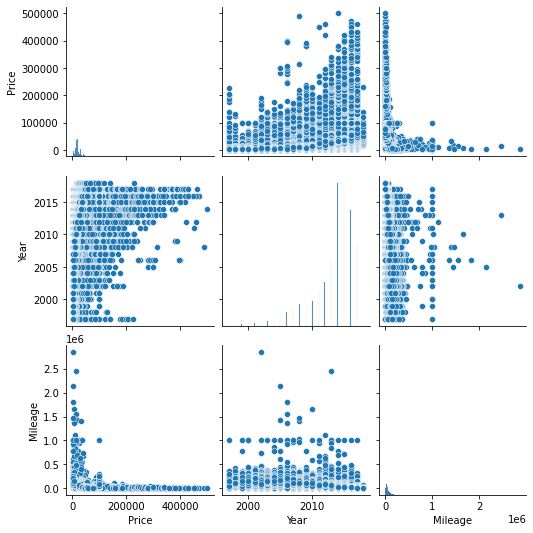

In [ ]:
#Visualizing the data using seaborn
sns.pairplot(df)

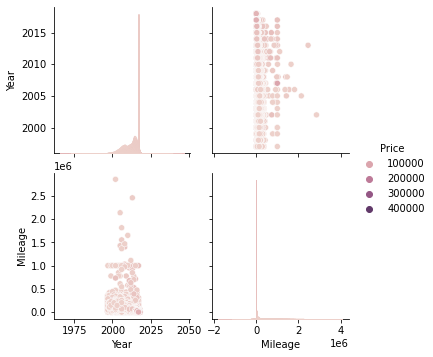

In [ ]:
sns.pairplot(df, hue = "Price")

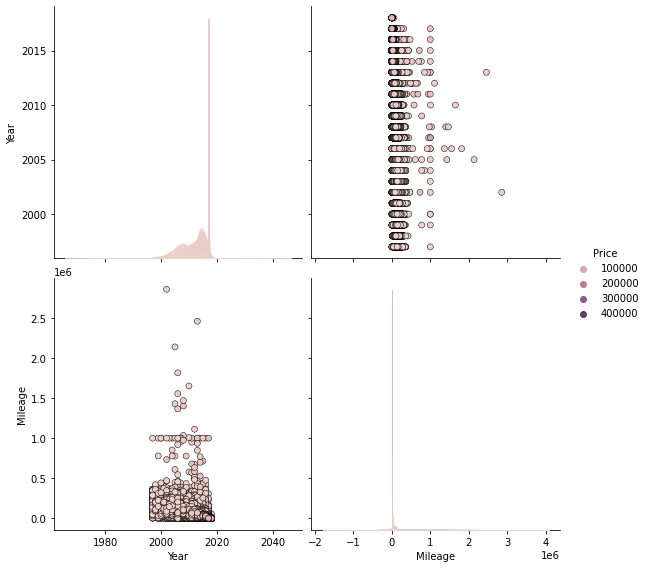

In [ ]:
sns.pairplot(df, hue = 'Price', diag_kind = 'kde',
             plot_kws = {'edgecolor': 'k'}, height = 4)

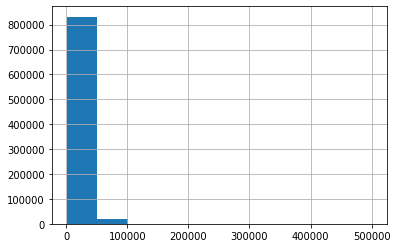

In [ ]:
df.Price.hist()

**How does the mileage affect the price?**


Text(0, 0.5, 'Price')

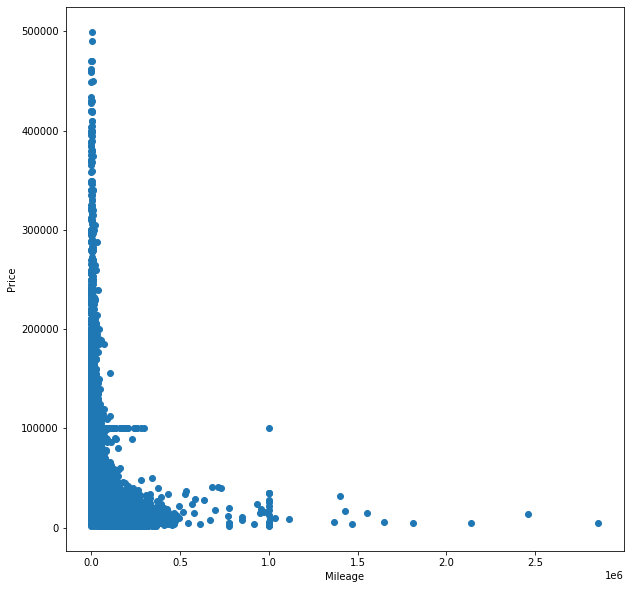

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='Mileage',y='Price',data=df)
plt.xlabel('Mileage')
plt.ylabel('Price')

**How does the age of the car affect the price?**

In [ ]:
# #Calculate age of vehicles 

# df["NumOfYears"] = 2018 - df["Year"]
# df["NumOfYears"]

Text(0, 0.5, 'Price')

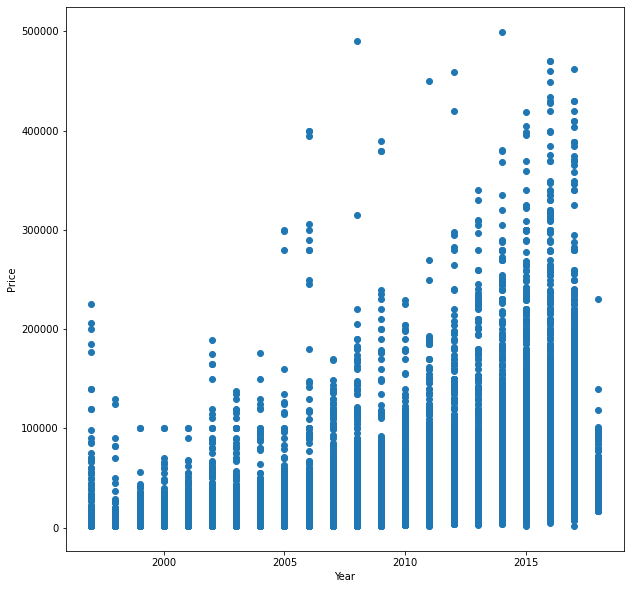

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='Year',y='Price',data=df)
plt.xlabel('Year')
plt.ylabel('Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


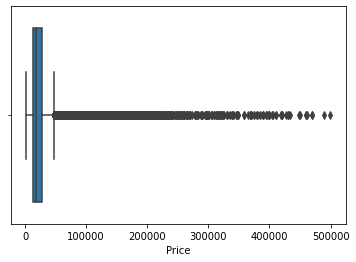

In [ ]:
#Visualizing the outliers in data(target variable)
sns.boxplot(df.Price)

In [ ]:
#Removing some of outliers 
df2 =df[df.Price <=46000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


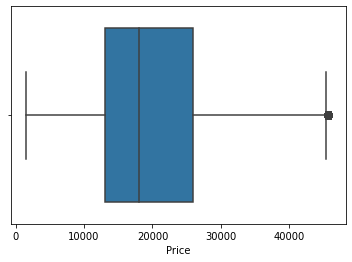

In [ ]:
#Visualizing the data after removing outliers
sns.boxplot(df2.Price)

In [ ]:

df2.shape

(819534, 8)

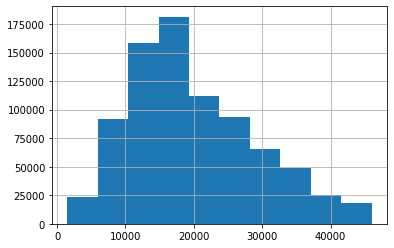

In [ ]:
#plotting the scatterplot
df2.Price.hist()

In [ ]:
# sns.lineplot(data=df, x="Year", y="Price")

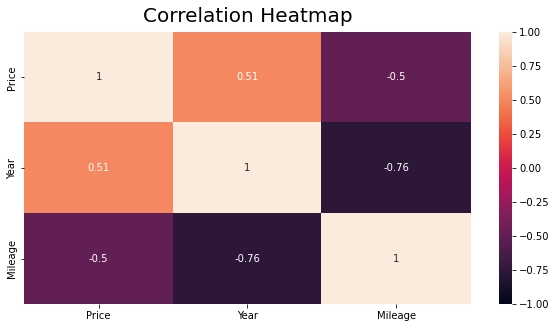

In [ ]:
#Visualizing the correlation of various features against the target variable
plt.figure(figsize=(10,5))
feature_corr = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
feature_corr.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10);

In [ ]:
df2.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
#Dropping features with string description, label encoder will be explored in the next phase
df2=df2.drop(['City'], axis = 1)

In [ ]:
df2.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Vin        object
Make       object
Model      object
dtype: object

In [ ]:
#Defining the x and y variables for the model building 
X=df2.drop("Price", axis=1)
X= X[[	"Year",	"Mileage"	]]

In [ ]:
y=df2.Price

In [ ]:
#Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((655627, 2), (655627,))

In [ ]:
#Linear Regression algorithm (Gradient Descent could be computed for the best fit for better accuracy)
lg = LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

print("Training score (X_train, y_train):", lg.score(X_train,y_train))
print("Test score (X_train, y_train):", lg.score(X_test,y_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(lg,X_train, y_train, cv=5).mean())

Training score (X_train, y_train): 0.2866353597570145
Test score (X_train, y_train): 0.28697980263381206
Mean cross-validation score on (X_train, y_train): 0.28659009459591206


In [ ]:
# calculate MAE,RMSE

y2_pred=lg.predict(X_test)
r2_score(y_test, y2_pred), mean_absolute_error(y_test, y2_pred), np.sqrt(mean_squared_error(y_test, y2_pred))


(0.28697980263381206, 6346.527097565901, 7803.216728462488)

In [ ]:
KNNR = KNeighborsRegressor()
KNNR.fit(X_train,y_train)
KNNR.score(X_test,y_test)

print("Training score (X_train, y_train):", KNNR.score(X_train,y_train))
print("Test score (X_train, y_train):", KNNR.score(X_test,y_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(KNNR,X_train, y_train, cv= 5).mean())

Training score (X_train, y_train): 0.4416993610110348
Test score (X_train, y_train): 0.17336288813043443
Mean cross-validation score on (X_train, y_train): 0.16866256545137123


In [ ]:
# calculate R2,MAE,RMSE
y2_pred=KNNR.predict(X_test)
r2_score(y_test, y2_pred), mean_absolute_error(y_test, y2_pred), np.sqrt(mean_squared_error(y_test, y2_pred))


(0.17336288813043443, 6681.30449462195, 8401.95212892176)

Changing the numerical value of Price to categorical value

In [ ]:
df2["Price_bins"]=df2.Price.apply(lambda x: "high" if x> 18500 else "low" )

In [ ]:
df2.Price_bins.value_counts()

low     426991
high    392543
Name: Price_bins, dtype: int64

In [ ]:
y2=df2.Price_bins

In [ ]:
#Data Splittingg for training and testing
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size =0.2, random_state=42)

In [ ]:
X_train.shape, y2_train.shape

((655627, 2), (655627,))

In [ ]:
#Logistic Regression Algorithm
LogR = LogisticRegression()
LogR.fit(X_train,y2_train)
LogR.score(X_test,y2_test)

print("Training score (X_train, y2_train):", LogR.score(X_train,y2_train))
print("Test score (X_train, y2_train):", LogR.score(X_test,y2_test))

print("Mean cross-validation score on (X_train, y2_train):", cross_val_score(LogR,X_train, y2_train, cv=5).mean())

Training score (X_train, y2_train): 0.6668364786685113
Test score (X_train, y2_train): 0.6675248769119073
Mean cross-validation score on (X_train, y2_train): 0.6668441044465385


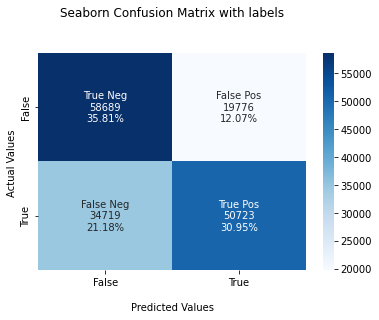

In [ ]:
#Confusion_Matrix
y2_pred=LogR.predict(X_test)
cf_matrix=confusion_matrix(y2_test, y2_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#K-Nearest Neighbour Algorithm
KNN = KNeighborsClassifier()
KNN.fit(X_train,y2_train)
KNN.score(X_test,y2_test)

print("Training score (X_train, y_train):", KNN.score(X_train,y2_train))
print("Test score (X_train, y_train):", KNN.score(X_test,y2_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(KNN,X_train, y2_train, cv=5).mean())

Training score (X_train, y_train): 0.7527862641410437
Test score (X_train, y_train): 0.635451811087995
Mean cross-validation score on (X_train, y_train): 0.6342020703014865


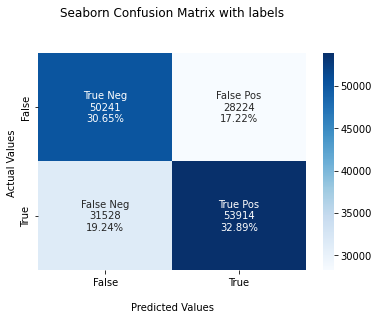

In [ ]:
#Confusion_Matrix
y2_pred=KNN.predict(X_test)
cf_matrix=confusion_matrix(y2_test, y2_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Adding more features to improve performance

In [ ]:
#
df2.head(5)


,Price,Year,Mileage,State,Vin,Make,Model,Price_bins
0,8995,2014,35725,TX,19VDE2E53EE000083,Acura,ILX6-Speed,low
1,10888,2013,19606,NY,19VDE1F52DE012636,Acura,ILX5-Speed,low
2,8995,2013,48851,TX,19VDE2E52DE000025,Acura,ILX6-Speed,low
3,10999,2014,39922,CO,19VDE1F71EE003817,Acura,ILX5-Speed,low
4,14799,2016,22142,UT,19UDE2F32GA001284,Acura,ILXAutomatic,low


In [ ]:
#Label Encoder
label =LabelEncoder()
#df3["City"]=label.fit_transform(df3["City"])
df2["State"]=label.fit_transform(df2["State"])
#df3["Vin"]=label.fit_transform(df3["Vin"])
df2["Make"]=label.fit_transform(df2["Make"])
df2["Model"]=label.fit_transform(df2["Model"])

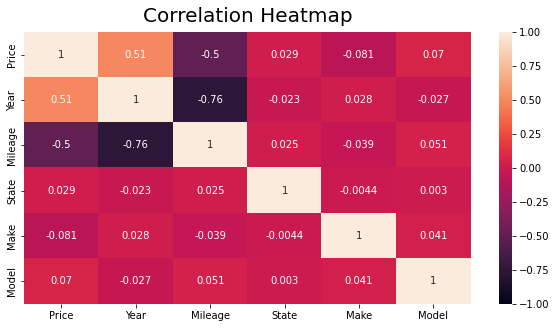

In [ ]:
#Visualizing the features
plt.figure(figsize=(10,5))
feature_corr = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
feature_corr.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10);

In [ ]:
y2=df2.Price_bins
X=df2.drop("Price", axis=1)
X= X[[	"Year","Make","Model","State"]]

In [ ]:
#Data Splitting for training and testing
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size =0.2, random_state=42)

In [ ]:
#Logistic Regression Algorithm
LogR = LogisticRegression()
LogR.fit(X_train,y2_train)
LogR.score(X_test,y2_test)

print("Training score (X_train, y_train):", LogR.score(X_train,y2_train))
print("Test score (X_train, y_train):", LogR.score(X_test,y2_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(LogR,X_train, y2_train, cv=5).mean())

Training score (X_train, y_train): 0.5402584091259207
Test score (X_train, y_train): 0.53948885648569
Mean cross-validation score on (X_train, y_train): 0.5402706111748635


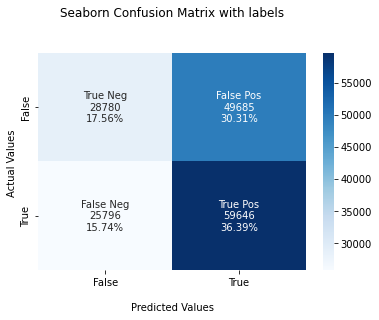

In [ ]:

#Confusion_Matrix
y2_pred=LogR.predict(X_test)
cf_matrix=confusion_matrix(y2_test, y2_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#K-Nearest Neighbour Algorithm
KNN = KNeighborsClassifier()
KNN.fit(X_train,y2_train)
KNN.score(X_test,y2_test)

print("Training score (X_train, y2_train):", KNN.score(X_train,y2_train))
print("Test score (X_train, y2_train):", KNN.score(X_test,y2_test))

print("Mean cross-validation score on (X_train, y2_train):", cross_val_score(KNN,X_train, y2_train, cv=5).mean())

Training score (X_train, y2_train): 0.9116891159149944
Test score (X_train, y2_train): 0.8963619613561349
Mean cross-validation score on (X_train, y2_train): 0.8970435932273467


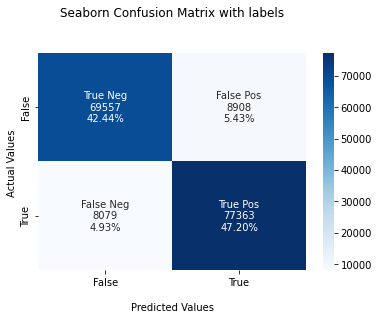

In [ ]:
#Confusion_Matrix
y2_pred=KNN.predict(X_test)
cf_matrix=confusion_matrix(y2_test, y2_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#SVC Algorithm
SVC = LinearSVC(dual = False)
SVC.fit(X_train,y2_train)
SVC.score(X_test,y2_test)

print("Training score (X_train, y2_train):", SVC.score(X_train,y2_train))
print("Test score (X_train, y2_train):", SVC.score(X_test,y2_test))

print("Mean cross-validation score on (X_train, y2_train):", cross_val_score(SVC,X_train, y2_train, cv=5).mean())


Training score (X_train, y2_train): 0.540279762730943
Test score (X_train, y2_train): 0.5395254626098946
Mean cross-validation score on (X_train, y2_train): 0.5401775704509799


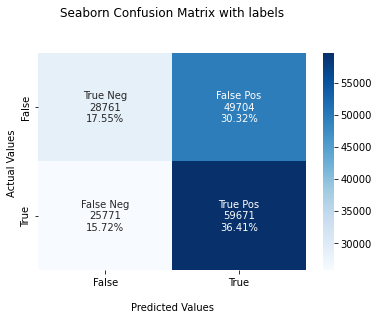

In [ ]:
#Confusion_Matrix
y2_pred=SVC.predict(X_test)
cf_matrix=confusion_matrix(y2_test, y2_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# #Confusion_Matrix
# y2_pred=KNN.predict(X_test)
# confusion_matrix(y2_test, y2_pred)

In [ ]:
y=df2.Price

In [ ]:
#Data Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [ ]:
poly_regs= PolynomialFeatures(degree= 2)  
x_poly= poly_regs.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train) 


LinearRegression()

In [ ]:
#Linear Regression algorithm (Gradient Descent could be computed for the best fit for better accuracy)
lg = LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

print("Training score (X_train, y_train):", lg.score(X_train,y_train))
print("Test score (X_train, y_train):", lg.score(X_test,y_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(lg,X_train, y_train).mean())

Training score (X_train, y_train): 0.2757917744449543
Test score (X_train, y_train): 0.2756483248579099
Mean cross-validation score on (X_train, y_train): 0.27575894725453887


In [ ]:
#Confusion_Matrix
y2_pred=lg.predict(X_test)
r2_score(y_test, y2_pred), mean_absolute_error(y_test, y2_pred), np.sqrt(mean_squared_error(y_test, y2_pred))


(0.2756483248579099, 6367.3406297048205, 7864.977556455657)

In [ ]:
KNNR = KNeighborsRegressor()
KNNR.fit(X_train,y_train)
KNNR.score(X_test,y_test)

print("Training score (X_train, y_train):", KNNR.score(X_train,y_train))
print("Test score (X_train, y_train):", KNNR.score(X_test,y_test))

print("Mean cross-validation score on (X_train, y_train):", cross_val_score(KNNR,X_train, y_train, cv= 5).mean())

Training score (X_train, y_train): 0.884024754891317
Test score (X_train, y_train): 0.860544632403499
Mean cross-validation score on (X_train, y_train): 0.8579658017441393


In [ ]:
#Confusion_Matrix
#Confusion_Matrix
y2_pred=KNNR.predict(X_test)
r2_score(y_test, y2_pred), mean_absolute_error(y_test, y2_pred), np.sqrt(mean_squared_error(y_test, y2_pred))


(0.860544632403499, 2440.9726527848106, 3450.9635378058633)

In [ ]:
Knearest